In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

In [5]:
data = pd.read_csv('headbrain.csv')

In [7]:
data.shape

(237, 4)

In [11]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [19]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [25]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
# Total Number of values
m = len(X)
#using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) **2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)
# Print Coefficients
print(b1 , b0)

0.26342933948939945 325.57342104944223


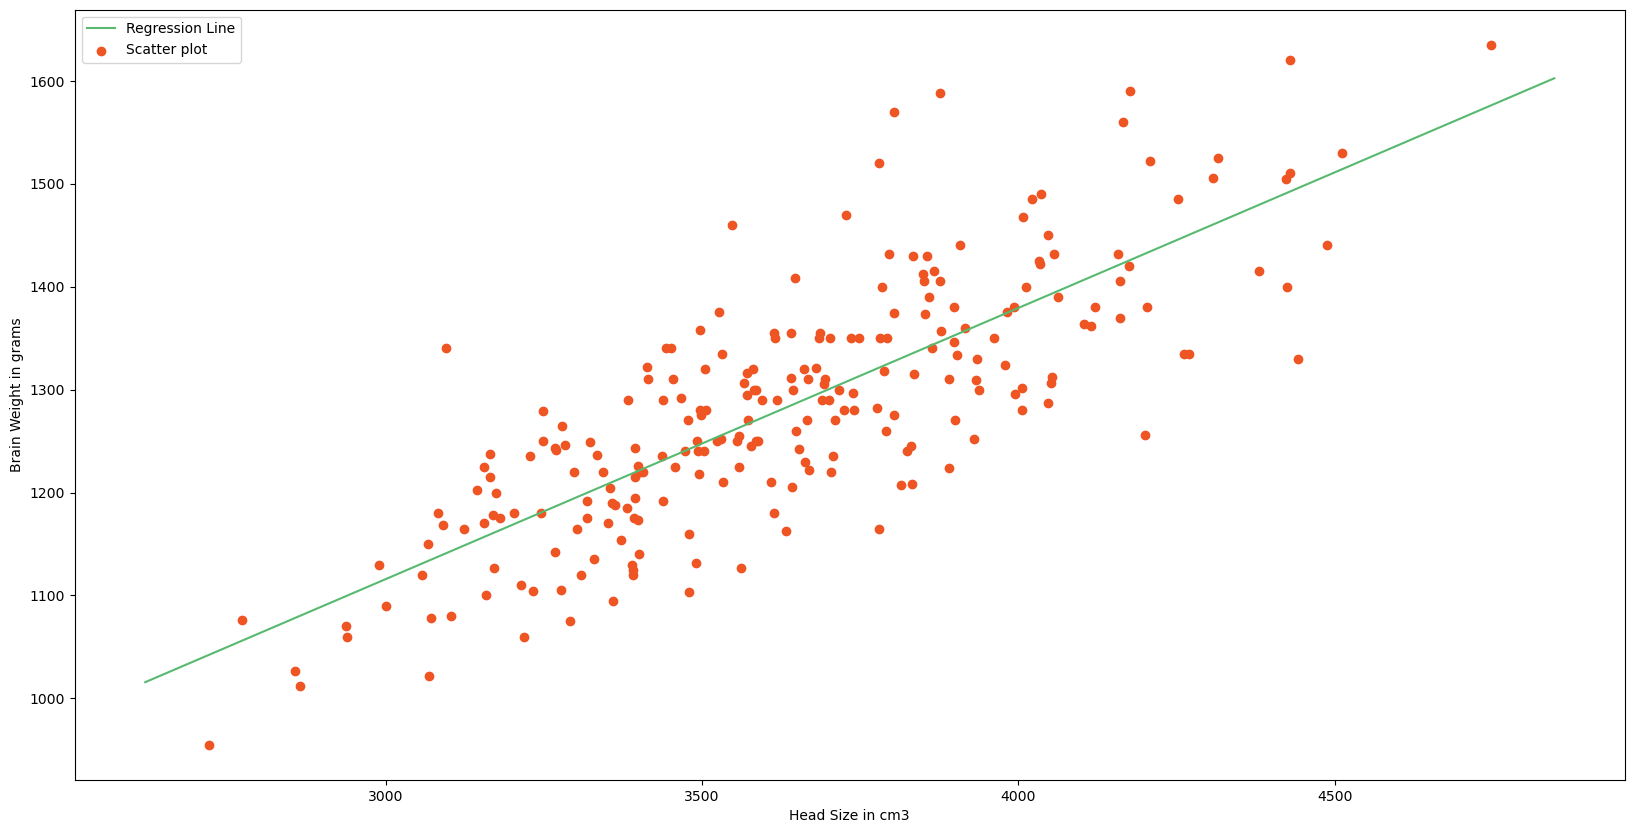

In [35]:
# Plotting Values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculating line values x and y
x = np.linspace(min_x,max_x,1000)
y = b0 + b1 * x

# ploting Line
plt.plot(x, y ,color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X,Y,c='#ef5423', label = 'Scatter plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()


In [39]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m,1))

# Creating Model
reg = LinearRegression()
# Fitting training  Data
reg = reg.fit(X,Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y,Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X,Y)

In [49]:
rmse

72.1206213783709

In [51]:
r2_score

0.639311719957